<ipython-input-1-6622d6a09354>:28: RuntimeWarning: invalid value encountered in divide
  gamma1 = prob1 / total_prob
<ipython-input-1-6622d6a09354>:29: RuntimeWarning: invalid value encountered in divide
  gamma2 = prob2 / total_prob


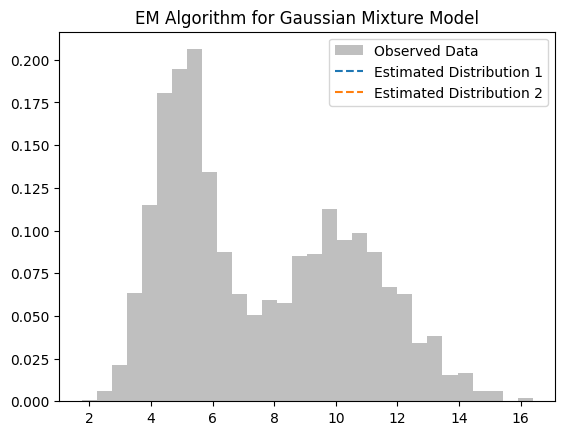

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

np.random.seed(42)

mu1, sigma1 = 5, 1
mu2, sigma2 = 10, 2

data1 = np.random.normal(mu1, sigma1, 1000)
data2 = np.random.normal(mu2, sigma2, 1000)
observed_data = np.concatenate([data1, data2])

def initialize_parameters():
    pi = np.random.rand()
    mu1, mu2 = np.random.rand() * 10, np.random.rand() * 10
    sigma1, sigma2 = np.random.rand(), np.random.rand()
    return pi, mu1, sigma1, mu2, sigma2

def gaussian(x, mu, sigma):
    return norm.pdf(x, mu, sigma)

def expectation_step(data, pi, mu1, sigma1, mu2, sigma2):
    prob1 = pi * gaussian(data, mu1, sigma1)
    prob2 = (1 - pi) * gaussian(data, mu2, sigma2)

    total_prob = prob1 + prob2
    gamma1 = prob1 / total_prob
    gamma2 = prob2 / total_prob

    return gamma1, gamma2

def maximization_step(data, gamma1, gamma2):
    N1 = np.sum(gamma1)
    N2 = np.sum(gamma2)

    pi = (N1 + N2) / len(data)
    mu1 = np.sum(gamma1 * data) / N1
    sigma1 = np.sqrt(np.sum(gamma1 * (data - mu1)**2) / N1)

    mu2 = np.sum(gamma2 * data) / N2
    sigma2 = np.sqrt(np.sum(gamma2 * (data - mu2)**2) / N2)

    return pi, mu1, sigma1, mu2, sigma2

def em_algorithm(data, num_iterations):
    pi, mu1, sigma1, mu2, sigma2 = initialize_parameters()

    for _ in range(num_iterations):
        gamma1, gamma2 = expectation_step(data, pi, mu1, sigma1, mu2, sigma2)
        pi, mu1, sigma1, mu2, sigma2 = maximization_step(data, gamma1, gamma2)

    return pi, mu1, sigma1, mu2, sigma2

num_iterations = 50
estimated_pi, estimated_mu1, estimated_sigma1, estimated_mu2, estimated_sigma2 = em_algorithm(observed_data, num_iterations)
x = np.linspace(0, 15, 1000)
plt.hist(observed_data, bins=30, density=True, alpha=0.5, color='gray', label='Observed Data')

plt.plot(x, estimated_pi * gaussian(x, estimated_mu1, estimated_sigma1), '--', label='Estimated Distribution 1')
plt.plot(x, (1 - estimated_pi) * gaussian(x, estimated_mu2, estimated_sigma2), '--', label='Estimated Distribution 2')

plt.title('EM Algorithm for Gaussian Mixture Model')
plt.legend()
plt.show()

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


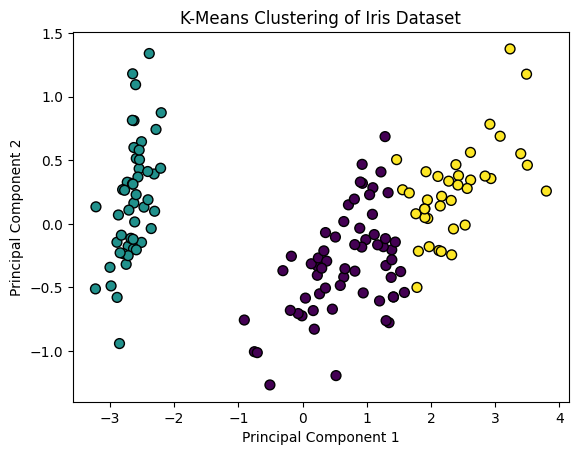

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
iris = load_iris()
X = iris.data
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Scatter plot to visualize the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50)
plt.title('K-Means Clustering of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd
transactions = [
    ['bread', 'milk', 'eggs'],
    ['bread', 'butter', 'jelly'],
    ['milk', 'butter', 'bread', 'jelly'],
    ['milk', 'eggs', 'butter'],
    ['bread', 'milk', 'butter', 'jelly']
]
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
print("Frequent Itemsets:")
print(frequent_itemsets)
print("\nAssociation Rules:")
print(rules)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
iris = load_iris()
X = iris.data
y = iris.target
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolors='k', s=70)
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()